In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
from tabulate import tabulate

### Init Dataset

In [109]:
df = pd.read_csv("KC_housing_data.csv")
plt.style.use("seaborn-v0_8")
sns.set_palette("muted")

### Data Cleaning and Preparation

In [148]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

df = df.drop_duplicates()

df = df[df["price"] > 50000]

zip_city = df.groupby(["city", "statezip"])["price"].mean().reset_index().sort_values("price", ascending=False)
zip_city.head(10)
top_cities = df.groupby("city")["price"].mean().sort_values(ascending=False).head(10)
top_zips = df.groupby("statezip")["price"].mean().sort_values(ascending=False).head(10)
# top 10 cities
top_cities_list = top_cities.index.tolist()
# top 10 zips
top_zips_list = top_zips.index.tolist()
# see which top zips belong to which top cities
overlap = zip_city[zip_city["statezip"].isin(top_zips_list) & zip_city["city"].isin(top_cities_list)]
print(df.columns)
print(df.isna().sum())

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'year', 'month'],
      dtype='object')
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
month            0
dtype: int64


### Summary Statistics

In [111]:
avg_price = df["price"].mean()
min_price = df["price"].min()
max_price = df["price"].max()

print(f"AVG price: {avg_price:,.0f}")
print(f"Min price: {min_price:,.0f}")
print(f"Max price: {max_price:,.0f}")

AVG price: 558,027
Min price: 80,000
Max price: 26,590,000


### Price Distribution

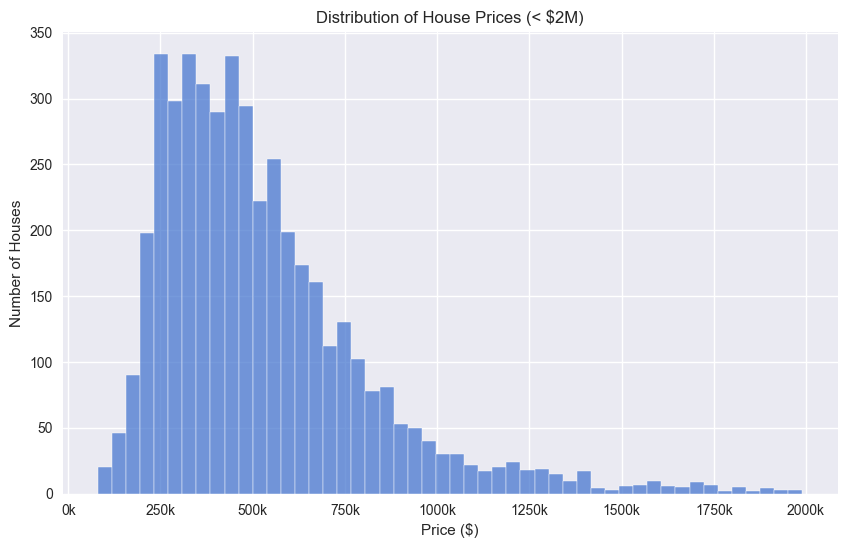

In [160]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df[df["price"] < 2000000]["price"], bins=50, kde=False)
plt.title("Distribution of House Prices (< $2M)")
plt.xlabel("Price ($)")
plt.ylabel("Number of Houses")
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.show()

### Top 10 Cities by Average Price

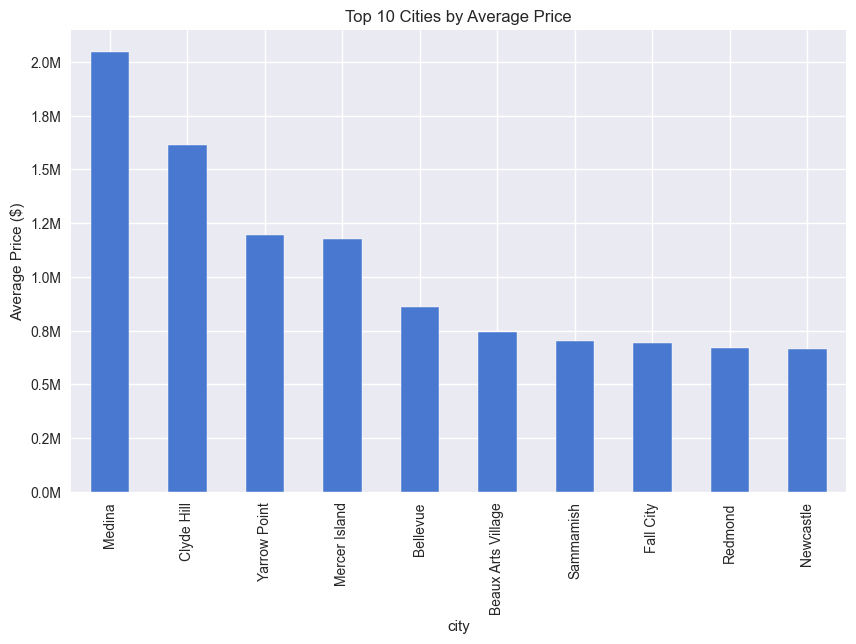

In [149]:
avg_price_city = df.groupby("city")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax = avg_price_city.head(10).plot(kind="bar")
plt.title("Top 10 Cities by Average Price")
plt.ylabel("Average Price ($)")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))
plt.show()

### Top 10 ZIPs by Average Price

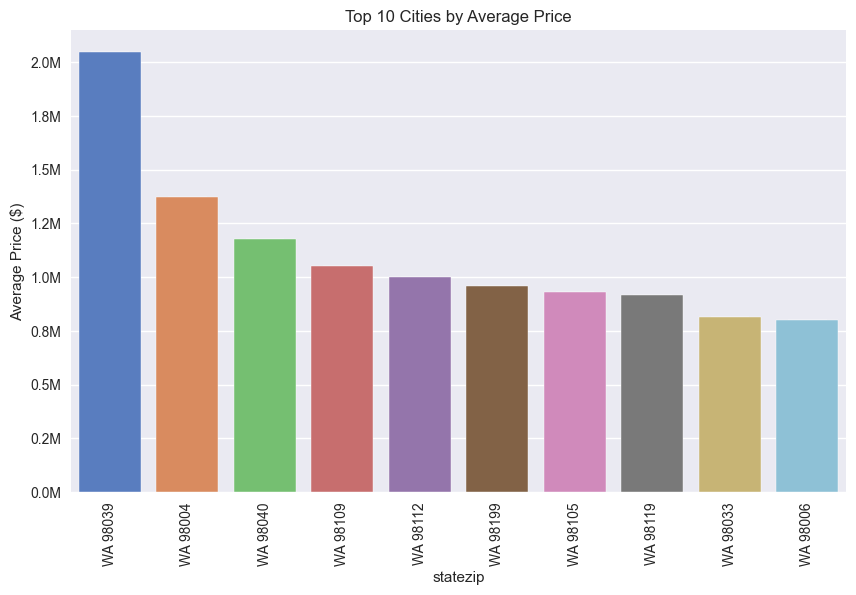

In [175]:
avg_price_city = df.groupby("statezip")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax = avg_price_city.head(10).plot(kind="bar")
sns.barplot(x=top_zips.index, y=top_zips.values, hue=top_zips.index)
plt.title("Top 10 Cities by Average Price")
plt.ylabel("Average Price ($)")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))
plt.show()

### Top 10 Cities by Average Price (Waterfront Homes)

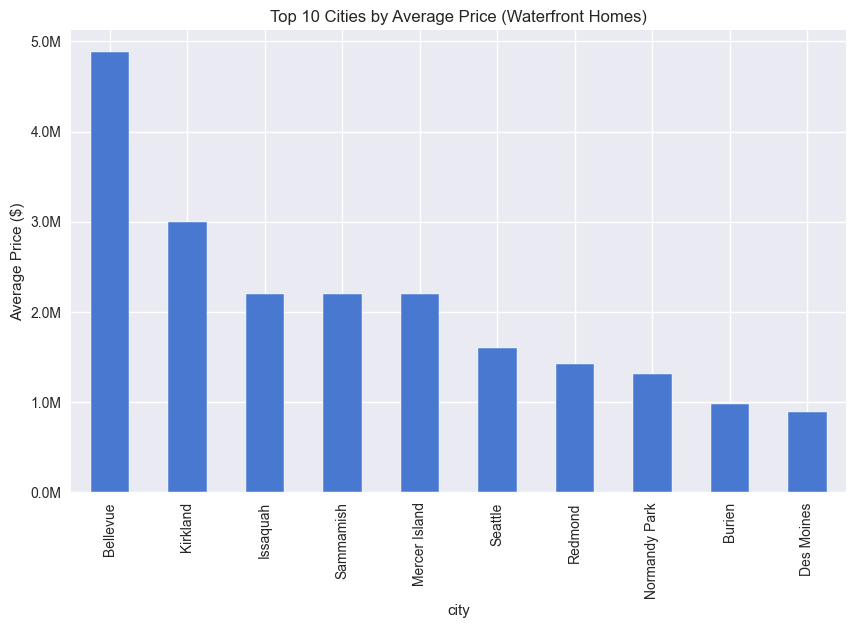

In [114]:
waterfront = df[df["waterfront"] == 1]
avg_price_waterfront = waterfront.groupby("city")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = avg_price_waterfront.head(10).plot(kind="bar")

plt.title("Top 10 Cities by Average Price (Waterfront Homes)")
plt.ylabel("Average Price ($)")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))
plt.show()

### Top ZIPs within Top Cities

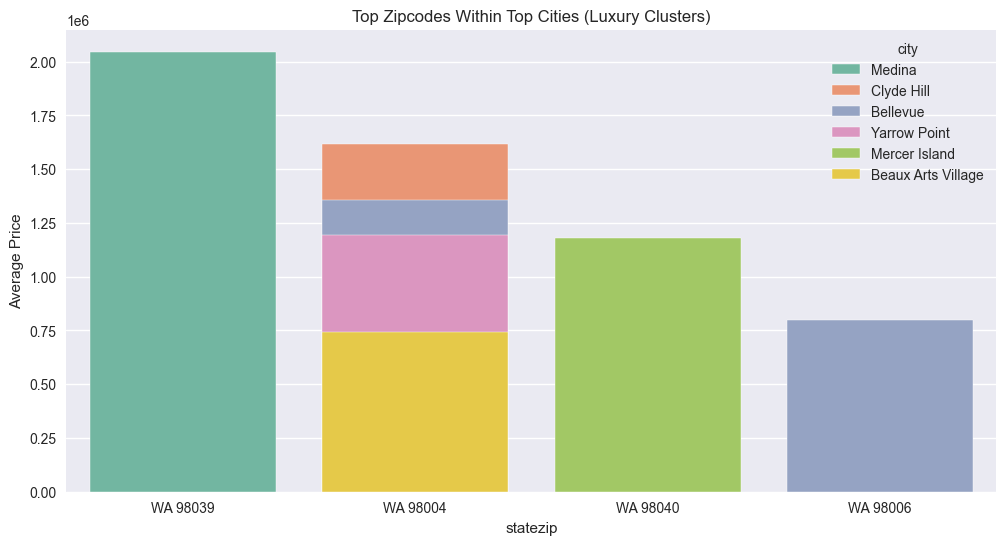

In [146]:
plt.figure(figsize=(12,6))
sns.barplot(x="statezip", y="price", hue="city", data=overlap, dodge=False, palette="Set2")
plt.title("Top Zipcodes Within Top Cities (Luxury Clusters)")
plt.ylabel("Average Price")
plt.show()

### Price vs Living Space (Waterfront Homes)

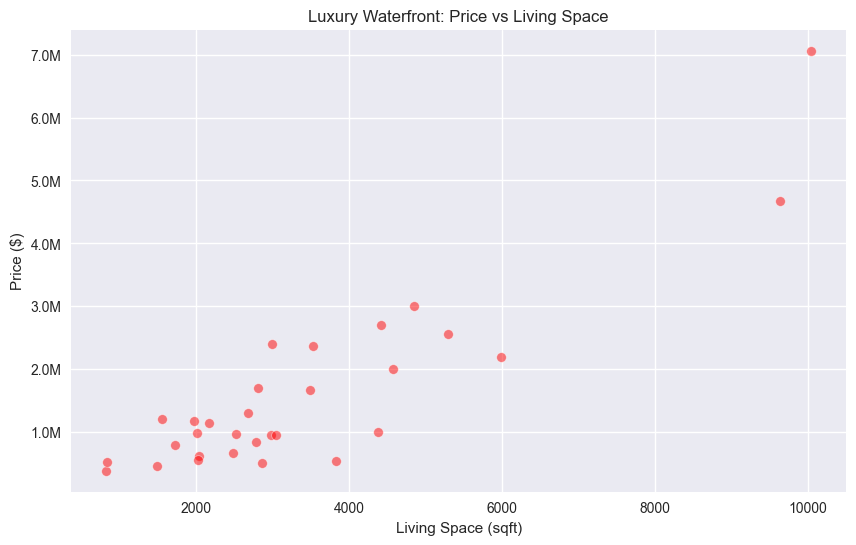

In [115]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    x="sqft_living",
    y="price",
    data=df[df["waterfront"] == 1],
    alpha=0.5,
    color="red"
)

plt.title("Luxury Waterfront: Price vs Living Space")
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))
plt.show()

### Top Luxury Waterfront Homes by Condition & Price

In [116]:
waterfront_homes = df[df["waterfront"] == 1]
waterfront_sorted = waterfront_homes.sort_values(by=["condition", "price"], ascending=[False, False])

table = waterfront_sorted[["price", "city", "sqft_living", "bedrooms", "bathrooms", "condition", "view", "yr_built"]].head(20)
table["price"] = table["price"].apply(lambda x: f"${x:,.0f}")
print(tabulate(table, headers="keys", tablefmt="pretty", showindex=False))

+------------+---------------+-------------+----------+-----------+-----------+------+----------+
|   price    |     city      | sqft_living | bedrooms | bathrooms | condition | view | yr_built |
+------------+---------------+-------------+----------+-----------+-----------+------+----------+
| $3,000,000 |   Kirkland    |    4850     |   4.0    |   4.25    |     5     |  4   |   1989   |
|  $947,500  |    Burien     |    2980     |   3.0    |   2.75    |     5     |  2   |   1917   |
|  $549,000  |    Vashon     |    2034     |   2.0    |    1.0    |     5     |  4   |   1947   |
| $1,700,000 |    Redmond    |    2810     |   3.0    |   2.75    |     4     |  4   |   1974   |
| $1,675,000 |    Seattle    |    3490     |   3.0    |    2.5    |     4     |  4   |   1939   |
| $1,200,000 | Mercer Island |    1560     |   3.0    |   1.75    |     4     |  4   |   1928   |
|  $950,000  |  Des Moines   |    3050     |   3.0    |   3.25    |     4     |  4   |   1962   |
|  $835,000  |  Des 

### Fresh & High-End Waterfront Homes (Condition + Price + Year + View)

In [117]:
waterfront_homes = df[df["waterfront"] == 1]
waterfront_sorted = waterfront_homes.sort_values(by=["condition", "price", "yr_built", "view"], ascending=[False, False, False, False])

table = waterfront_sorted[
    ["price", "city", "sqft_living", "bedrooms", "bathrooms", "condition", "view", "yr_built"]].head(10)
table["price"] = table["price"].apply(lambda x: f"${x:,.0f}")
print(tabulate(table, headers="keys", tablefmt="pretty", showindex=False))

+------------+---------------+-------------+----------+-----------+-----------+------+----------+
|   price    |     city      | sqft_living | bedrooms | bathrooms | condition | view | yr_built |
+------------+---------------+-------------+----------+-----------+-----------+------+----------+
| $3,000,000 |   Kirkland    |    4850     |   4.0    |   4.25    |     5     |  4   |   1989   |
|  $947,500  |    Burien     |    2980     |   3.0    |   2.75    |     5     |  2   |   1917   |
|  $549,000  |    Vashon     |    2034     |   2.0    |    1.0    |     5     |  4   |   1947   |
| $1,700,000 |    Redmond    |    2810     |   3.0    |   2.75    |     4     |  4   |   1974   |
| $1,675,000 |    Seattle    |    3490     |   3.0    |    2.5    |     4     |  4   |   1939   |
| $1,200,000 | Mercer Island |    1560     |   3.0    |   1.75    |     4     |  4   |   1928   |
|  $950,000  |  Des Moines   |    3050     |   3.0    |   3.25    |     4     |  4   |   1962   |
|  $835,000  |  Des 

### Potential Investment (Capital Investment) Renovation needed but with good View

In [133]:
waterfront_homes = df[df["waterfront"] == 1]
waterfront_sorted = waterfront_homes.sort_values(by=["condition", "price", "yr_built", "view"], ascending=[True, True, True, False])

table = waterfront_sorted[
    ["price", "city", "sqft_living", "bedrooms", "bathrooms", "condition", "view", "yr_built"]].head(10)
table["price"] = table["price"].apply(lambda x: f"${x:,.0f}")
print(tabulate(table, headers="keys", tablefmt="pretty", showindex=False))

+------------+---------------+-------------+----------+-----------+-----------+------+----------+
|   price    |     city      | sqft_living | bedrooms | bathrooms | condition | view | yr_built |
+------------+---------------+-------------+----------+-----------+-----------+------+----------+
| $2,555,000 |    Seattle    |    5300     |   4.0    |    2.5    |     2     |  2   |   1923   |
|  $465,000  |    Vashon     |    1494     |   2.0    |    2.0    |     3     |  4   |   1943   |
|  $503,000  |  Federal Way  |    2860     |   2.0    |   1.75    |     3     |  4   |   1948   |
|  $542,500  | Mercer Island |    3831     |   5.0    |   2.75    |     3     |  4   |   1959   |
|  $975,000  |    Seattle    |    2520     |   6.0    |   2.75    |     3     |  4   |   1954   |
|  $988,500  |    Burien     |    2015     |   3.0    |   2.75    |     3     |  4   |   2007   |
|  $995,000  |    Burien     |    4380     |   3.0    |    4.5    |     3     |  3   |   1968   |
| $1,150,000 |    Re

### Potential investment without waterfront (Good view)

In [178]:
potential_waterfront = df[
    (df["waterfront"] == 0) &
    (df["view"] >= 4) &
    (df["sqft_lot"] > 10000) &
    (df["condition"] <= 3)
]

potential_sorted = potential_waterfront.sort_values(by=["condition", "price", "yr_built", "view"], ascending=[False, False, False, False])

table = potential_sorted[
    ["price", "city", "sqft_living", "sqft_lot", "bedrooms", "bathrooms", "condition", "view", "yr_built"]
].head(10)

table["price"] = table["price"].apply(lambda x: f"${x:,.0f}")
table["sqft_living"] = table["sqft_living"].apply(lambda x: f"{x/1000:.1f}k sqft")
table["sqft_lot"] = table["sqft_lot"].apply(lambda x: f"{x/1000:.1f}k sqft")
print(tabulate(table, headers="keys", tablefmt="pretty", showindex=False))

+------------+------------+-------------+-------------+----------+-----------+-----------+------+----------+
|   price    |    city    | sqft_living |  sqft_lot   | bedrooms | bathrooms | condition | view | yr_built |
+------------+------------+-------------+-------------+----------+-----------+-----------+------+----------+
| $2,888,000 |  Seattle   |  8.7k sqft  | 64.0k sqft  |   5.0    |   6.25    |     3     |  4   |   1965   |
| $2,280,000 |  Redmond   | 13.5k sqft  | 307.8k sqft |   7.0    |    8.0    |     3     |  4   |   1999   |
| $1,600,000 |  Seattle   |  3.8k sqft  | 19.0k sqft  |   3.0    |   3.25    |     3     |  4   |   1985   |
| $1,228,000 | Sammamish  |  5.7k sqft  | 44.9k sqft  |   4.0    |    2.5    |     3     |  4   |   1991   |
| $1,149,000 | Snoqualmie |  5.9k sqft  | 11.5k sqft  |   4.0    |    3.0    |     3     |  4   |   2004   |
| $1,000,000 | Shoreline  |  2.4k sqft  | 23.4k sqft  |   2.0    |   1.75    |     3     |  4   |   1951   |
|  $905,000  |  Bel

###  Market Timing - Average Waterfront Home Prices Over Time (Monthly)

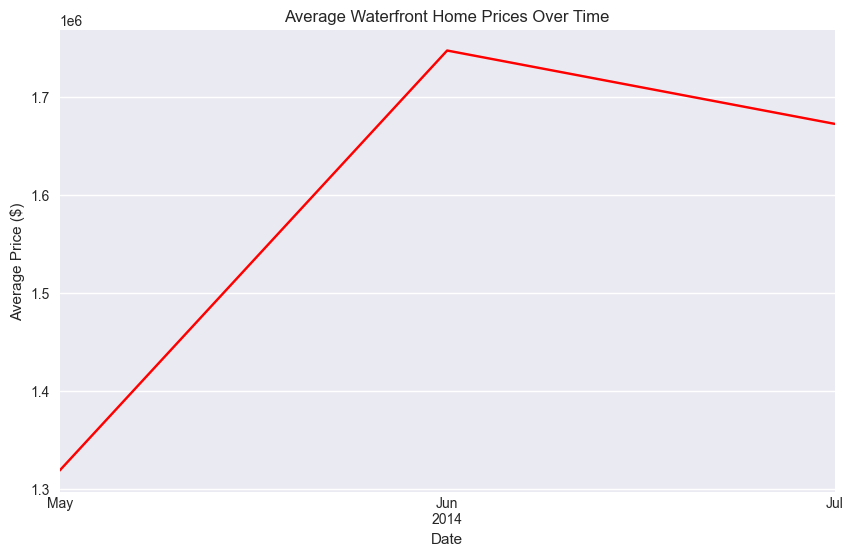

In [136]:
luxury = df[df["waterfront"] == 1].copy()
luxury["date"] = pd.to_datetime(luxury["date"], errors="coerce")

luxury["year_month"] = luxury["date"].dt.to_period("M")
monthly_price = luxury.groupby("year_month")["price"].mean()
plt.figure(figsize=(10,6))
monthly_price.plot(color="red")
plt.title("Average Waterfront Home Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price ($)")
plt.show()

### Best time to buy via AVG Price (monthly)

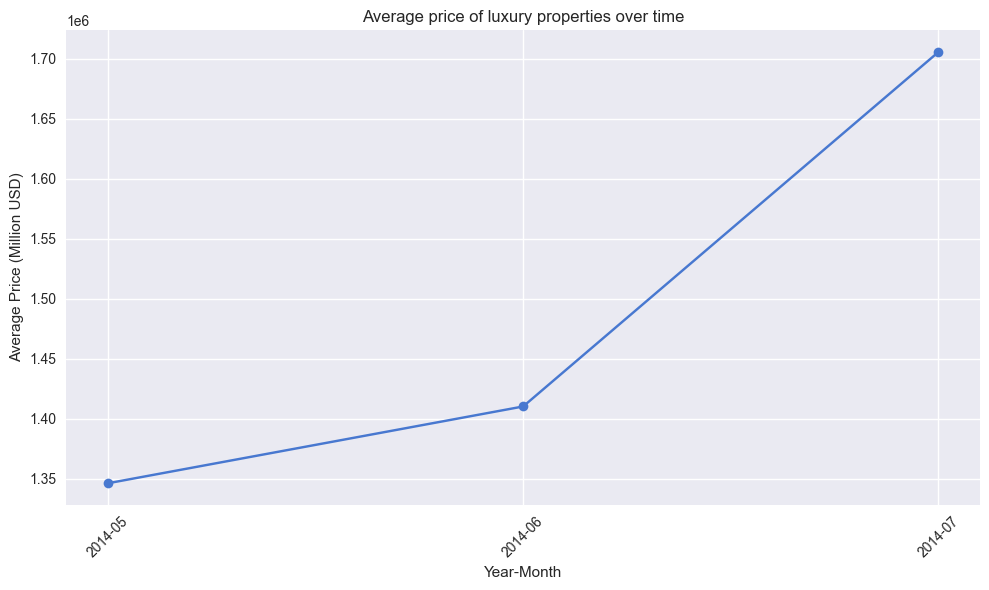

Price peak: 2014-07 with an average of 1,705,733 USD
Price dip: 2014-05 with an anverage of 1,346,206 USD


In [137]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

luxury_threshold = df['price'].quantile(0.9)
luxury_df = df[df['price'] >= luxury_threshold].copy()

luxury_monthly = luxury_df.groupby(['year', 'month'])['price'].mean().reset_index()
luxury_monthly['year_month'] = luxury_monthly['year'].astype(str) + '-' + luxury_monthly['month'].astype(str).str.zfill(2)

plt.figure(figsize=(10,6))
plt.plot(luxury_monthly['year_month'], luxury_monthly['price'], marker='o')
plt.xticks(rotation=45)
plt.title('Average price of luxury properties over time')
plt.xlabel('Year-Month')
plt.ylabel('Average Price (Million USD)')
plt.tight_layout()
plt.show()

peak = luxury_monthly.loc[luxury_monthly['price'].idxmax()]
dip = luxury_monthly.loc[luxury_monthly['price'].idxmin()]
print(f'Price peak: {peak["year_month"]} with an average of {peak["price"]:,.0f} USD')
print(f'Price dip: {dip["year_month"]} with an anverage of {dip["price"]:,.0f} USD')

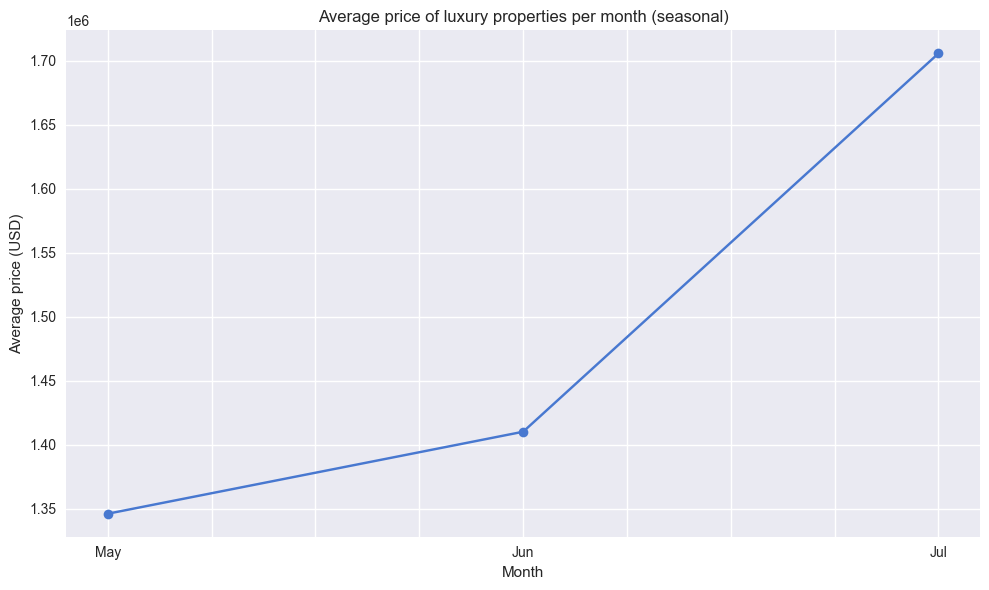

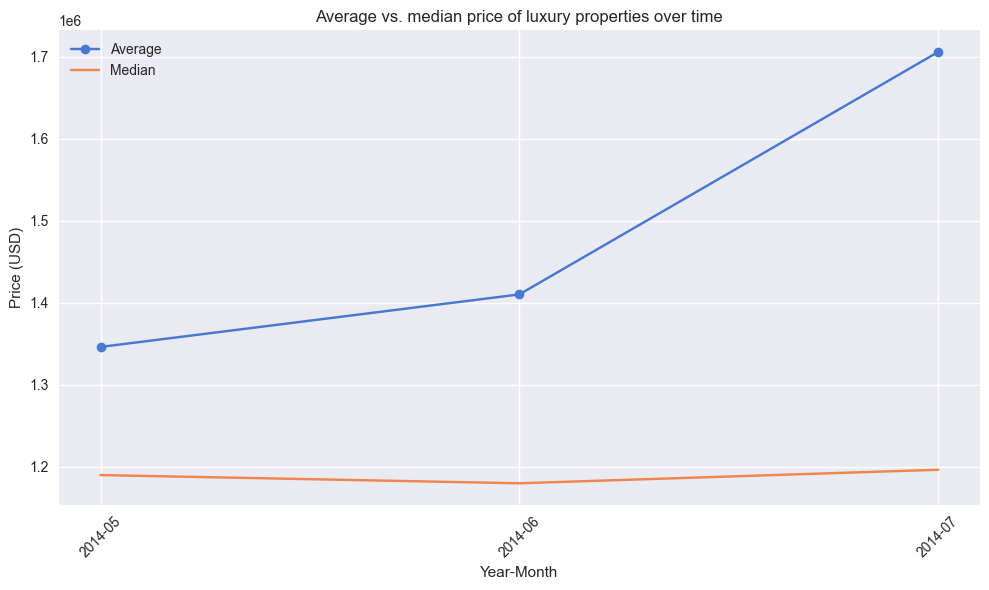

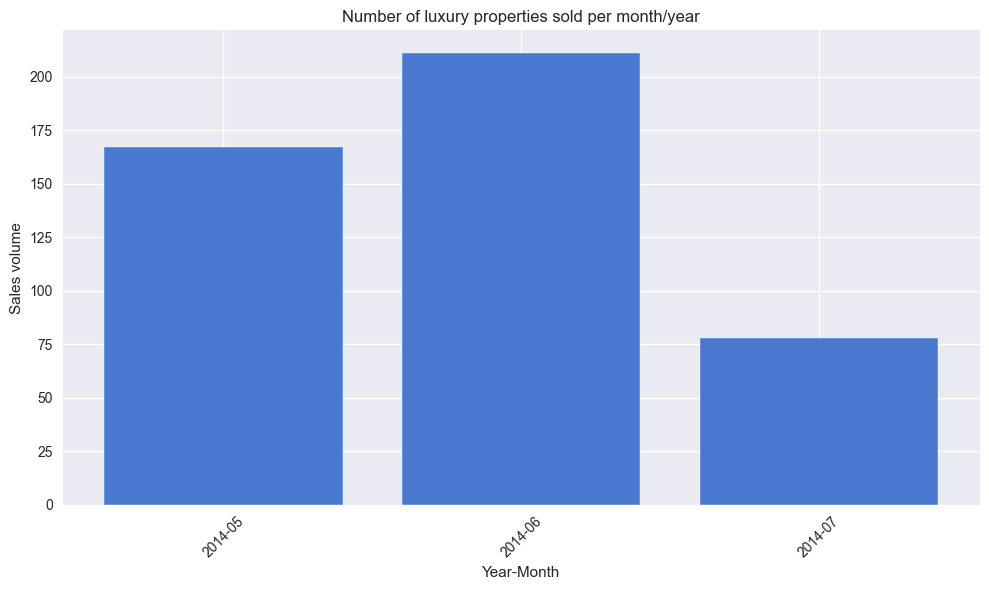

Interpretation:
- Seasonal fluctuations may indicate months with particularly high or low prices.
- The median price shows whether outliers distort the average.
- Sales volume provides insights into demand and market activity.


In [138]:
luxury_df['month_name'] = luxury_df['date'].dt.strftime('%b')
monthly_avg = luxury_df.groupby('month_name')['price'].mean().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.figure(figsize=(10,6))
monthly_avg.plot(kind='line', marker='o')
plt.title('Average price of luxury properties per month (seasonal)')
plt.xlabel('Month')
plt.ylabel('Average price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

luxury_monthly_median = luxury_df.groupby(['year', 'month'])['price'].median().reset_index()
luxury_monthly_median['year_month'] = luxury_monthly_median['year'].astype(str) + '-' + luxury_monthly_median['month'].astype(str).str.zfill(2)
plt.figure(figsize=(10,6))
plt.plot(luxury_monthly['year_month'], luxury_monthly['price'], label='Average', marker='o')
plt.plot(luxury_monthly_median['year_month'], luxury_monthly_median['price'], label='Median', marker='x')
plt.xticks(rotation=45)
plt.title('Average vs. median price of luxury properties over time')
plt.xlabel('Year-Month')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

luxury_monthly_count = luxury_df.groupby(['year', 'month']).size().reset_index(name='count')
luxury_monthly_count['year_month'] = luxury_monthly_count['year'].astype(str) + '-' + luxury_monthly_count['month'].astype(str).str.zfill(2)
plt.figure(figsize=(10,6))
plt.bar(luxury_monthly_count['year_month'], luxury_monthly_count['count'])
plt.xticks(rotation=45)
plt.title('Number of luxury properties sold per month/year')
plt.xlabel('Year-Month')
plt.ylabel('Sales volume')
plt.tight_layout()
plt.show()

print('Interpretation:')
print('- Seasonal fluctuations may indicate months with particularly high or low prices.')
print('- The median price shows whether outliers distort the average.')
print('- Sales volume provides insights into demand and market activity.')